In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\santi\AppData\Local\Temp\ipykernel_43952\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = "../data/datos_act1_derecho.xlsx"
data = pd.read_excel(data)
data

,ΔΘ (rad),m (cd lado) (g),error ΔΘ (rad),error m(cd lado) (g)
0,0.19,50,0.005,1.00
1,0.35,100,0.005,1.41
2,0.48,150,0.005,1.41
3,0.59,200,0.005,1.73
4,0.68,250,0.005,1.41
5,0.77,300,0.005,1.73
6,0.83,350,0.005,1.73
7,0.89,400,0.005,2.00


In [3]:
X = data['ΔΘ (rad)']
Xerr = data['error ΔΘ (rad)']

Y = data['m (cd lado) (g)']
Yerr = data['error m(cd lado) (g)']

w = 1/(Yerr**2)

Y

0     50
1    100
2    150
3    200
4    250
5    300
6    350
7    400
Name: m (cd lado) (g), dtype: int64

In [4]:
#Restar Act0
X = X - 0.0125

#Pasar a kg
Y = Y/1000
Yerr = Yerr/1000

#Pasar a torque
r = 0.01265
rerr = 0.00001
g = 9.77412
Yerr = np.sqrt( (2*r*Yerr*g)**2 + (2*rerr*Y*g)**2 )
Y = 2*r*Y*g

w = 1/(Yerr**2)

In [5]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [6]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [7]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.11465848449825747
-0.011539500198653964
0.0005242173686454817
0.0002878021371131471


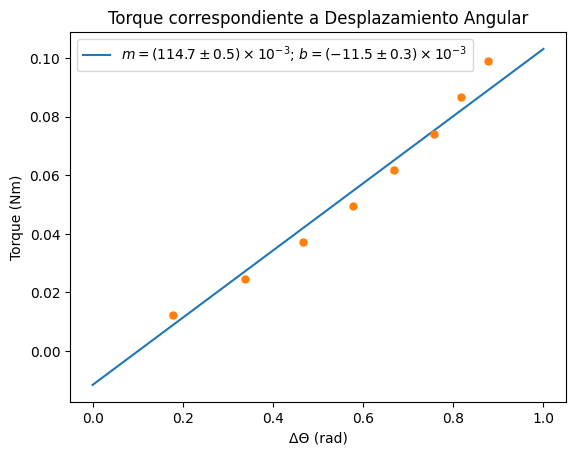

In [8]:
x = np.linspace(0, 1, 1001)
y = m*x+b

plt.plot(x, y, label = r"$m = (114.7\pm 0.5)\times 10^{-3}$" + "; " + r"$b = (-11.5\pm 0.3)\times 10^{-3}$")
plt.errorbar(X, Y, Yerr, Xerr, fmt="o", markersize=5, capsize=2)

plt.title("Torque correspondiente a Desplazamiento Angular")
plt.ylabel("Torque (Nm)")
plt.xlabel("ΔΘ (rad)")
plt.legend(loc="upper left")

plt.savefig("act1_img1")

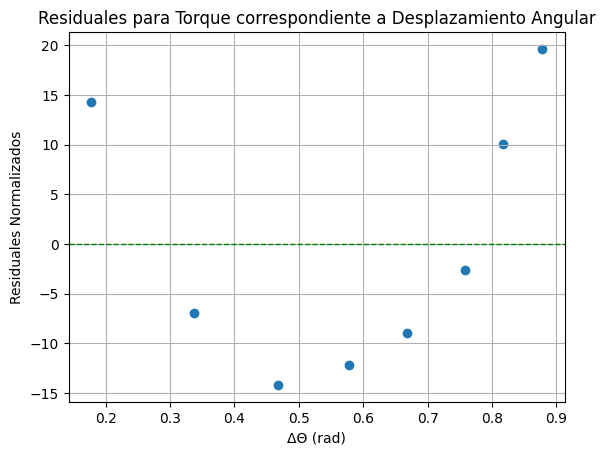

In [9]:
model = m*X+b
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('ΔΘ (rad)')
ax2.set_title('Residuales para Torque correspondiente a Desplazamiento Angular')
ax2.grid()

plt.savefig('act1_img1_res.png', format='png')

In [10]:
Y = Y.head(3)
X = X.head(3)

Yerr = Yerr.head(3)
Xerr = Xerr.head(3)

In [11]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [12]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [13]:
k1 = m
k1err = m_std_err

print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.07725729099575449
-0.0004123571216842478
0.0007547142707950004
0.00017396191016152575


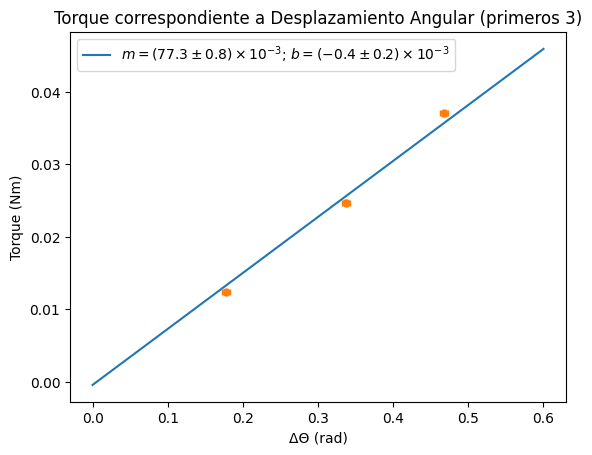

In [14]:
x = np.linspace(0, 0.6, 1001)
y = m*x+b

plt.plot(x, y, label = r"$m = (77.3\pm 0.8)\times 10^{-3}$" + "; " + r"$b = (-0.4\pm 0.2)\times 10^{-3}$")
plt.errorbar(X, Y, Yerr, Xerr, fmt="o", markersize=5, capsize=2)

plt.title("Torque correspondiente a Desplazamiento Angular (primeros 3)")
plt.ylabel("Torque (Nm)")
plt.xlabel("ΔΘ (rad)")
plt.legend(loc="upper left")

plt.savefig("act1_img1_first3")

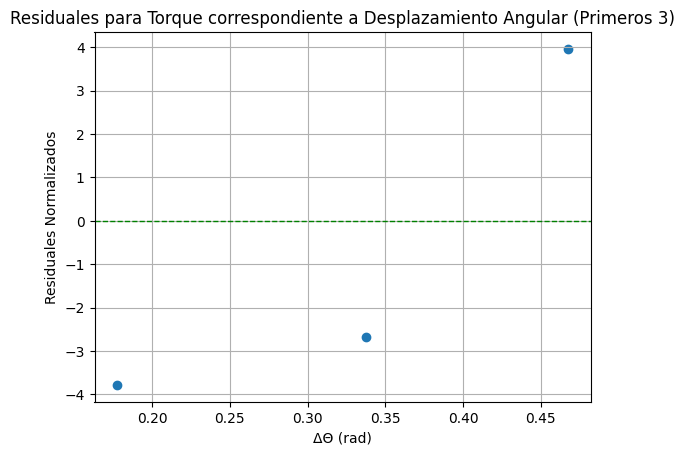

In [15]:
model = m*X+b
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('ΔΘ (rad)')
ax2.set_title('Residuales para Torque correspondiente a Desplazamiento Angular (Primeros 3)')
ax2.grid()

plt.savefig('act1_img1_first3_res.png', format='png')

In [16]:
data = "../data/datos_act1_reves.xlsx"
data = pd.read_excel(data)
data

,ΔΘ (rad),m (cd lado) (g),error ΔΘ (rad),error m(cd lado) (g)
0,-0.20,50,0.005,1.00
1,-0.37,100,0.005,1.41
2,-0.53,150,0.005,1.41
3,-0.66,200,0.005,1.73
4,-0.74,250,0.005,1.41
5,-0.86,300,0.005,1.73
6,-0.95,350,0.005,1.73
7,-1.03,400,0.005,2.00


In [17]:
X = data['ΔΘ (rad)']
Xerr = data['error ΔΘ (rad)']

Y = data['m (cd lado) (g)']
Yerr = data['error m(cd lado) (g)']

w = 1/(Yerr**2)

X

0   -0.20
1   -0.37
2   -0.53
3   -0.66
4   -0.74
5   -0.86
6   -0.95
7   -1.03
Name: ΔΘ (rad), dtype: float64

In [18]:
#Restar Act0
X = X - 0.0125

#Pasar a kg
Y = Y/1000
Yerr = Yerr/1000

#Pasar a torque
r = 0.01265
rerr = 0.00001
g = 9.77412
Yerr = np.sqrt( (2*r*Yerr*g)**2 + (2*rerr*Y*g)**2 )
Y = -2*r*Y*g

w = 1/(Yerr**2)

In [19]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [20]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [21]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.09911298474944744
0.01171651221709142
0.00045134606605522784
0.0002876087332420423


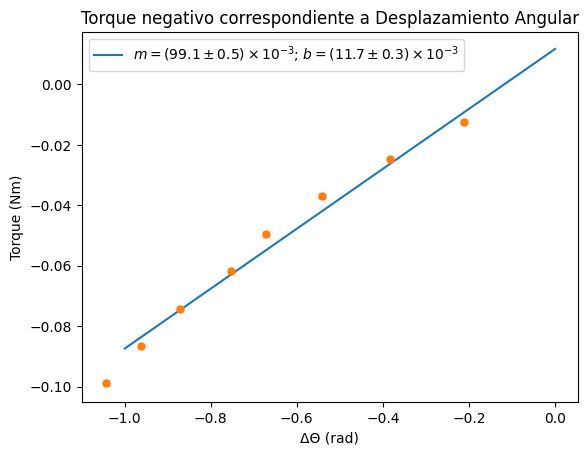

In [22]:
x = np.linspace(-1, 0, 1001)
y = m*x+b

plt.plot(x, y, label = r"$m = (99.1\pm 0.5)\times 10^{-3}$" + "; " + r"$b = (11.7\pm 0.3)\times 10^{-3}$")
plt.errorbar(X, Y, Yerr, Xerr, fmt="o", markersize=5, capsize=2)

plt.title("Torque negativo correspondiente a Desplazamiento Angular")
plt.ylabel("Torque (Nm)")
plt.xlabel("ΔΘ (rad)")
plt.legend(loc="upper left")

plt.savefig("act1_img2")

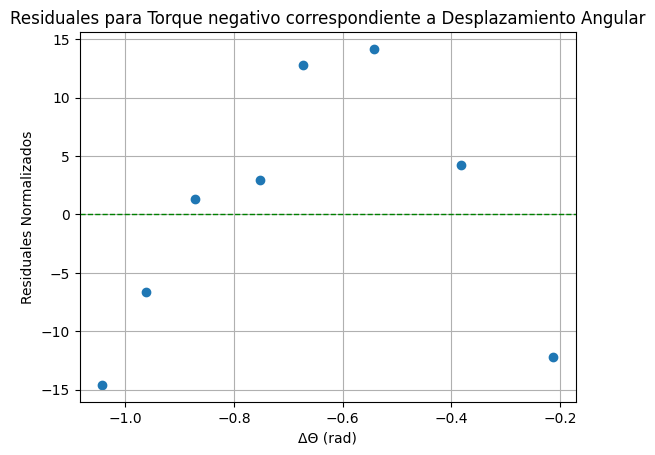

In [23]:
model = m*X+b
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('ΔΘ (rad)')
ax2.set_title('Residuales para Torque negativo correspondiente a Desplazamiento Angular')
ax2.grid()

plt.savefig('act1_img2_res.png', format='png')

In [24]:
Y = Y.head(3)
X = X.head(3)

Yerr = Yerr.head(3)
Xerr = Xerr.head(3)

In [25]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [26]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [27]:
k2 = m
k2err = m_std_err

print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.06689865762908773
0.0005052729937335401
0.0006538272454123356
0.0001746143706871785


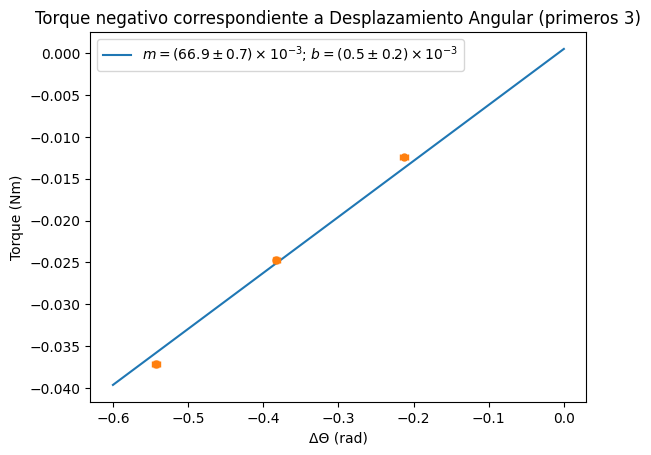

In [28]:
x = np.linspace(-0.6, 0, 1001)
y = m*x+b

plt.plot(x, y, label = r"$m = (66.9\pm 0.7)\times 10^{-3}$" + "; " + r"$b = (0.5\pm 0.2)\times 10^{-3}$")
plt.errorbar(X, Y, Yerr, Xerr, fmt="o", markersize=5, capsize=2)

plt.title("Torque negativo correspondiente a Desplazamiento Angular (primeros 3)")
plt.ylabel("Torque (Nm)")
plt.xlabel("ΔΘ (rad)")
plt.legend(loc="upper left")

plt.savefig("act1_img2_first3")

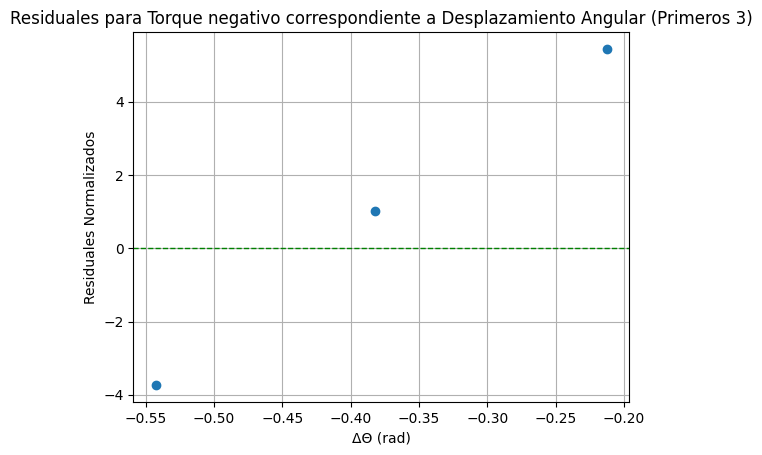

In [29]:
model = m*X+b
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('ΔΘ (rad)')
ax2.set_title('Residuales para Torque negativo correspondiente a Desplazamiento Angular (Primeros 3)')
ax2.grid()

plt.savefig('act1_img2_first3_res.png', format='png')

In [30]:
k_prom = (k1+k2)/2
k_prom_err = np.sqrt( k1err**2 + k2err**2 )

print(k_prom)
print(k_prom_err)

0.0720779743124211
0.0009985407840369424
